# Running DataWrangling_12 processes but on all counties in US rather than just NE states
# Running processes in DataWrangling11 but with ozone aqi only

# Rerun DataWrangling8 processes with alernative datasets from DataWrangling 9

In [2]:
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [3]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

    return NE_States
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

In [4]:
ozone_2017 = pd.read_csv('../../data/raw/daily_ozone_2017.csv')
ozone_2018 = pd.read_csv('../../data/raw/daily_ozone_2018.csv')
ozone_2019 = pd.read_csv('../../data/raw/daily_ozone_2019.csv')

county_incomes = r'../../data/processed/county_incomes_2017_2019'
county_incomes_2017_2019 = pd.read_csv(county_incomes)

educ_vehicle = r'../../data/processed/clean_edu_vehicle_2017_2019.csv'
educ_vehicle_2017_2019 = pd.read_csv(educ_vehicle)

pov_rate = r'../../data/processed/clean_pov_rate_2017_2019.csv'
pov_rate_2017_2019 = pd.read_csv(pov_rate)

unemploy_county_rate = r'../../data/processed/clean_UE_rate_2017_2019.csv'
unemploy_rate_2017_2019 = pd.read_csv(unemploy_county_rate)

county_dem_ratio = r'../../data/processed/clean_county_dem_ratio_2017_2019.csv'
county_dem_ratio_2017_2019 = pd.read_csv(county_dem_ratio)

## Retrieve ozone data

In [5]:
print(ozone_2017.shape)

(405603, 29)


In [6]:
# add GeoFIPS for NE aqi counties
ozone_2017 = get_df_with_geofips(ozone_2017, 'State Code', 'County Code')
ozone_2018 = get_df_with_geofips(ozone_2018, 'State Code', 'County Code')
ozone_2019 = get_df_with_geofips(ozone_2019, 'State Code', 'County Code')

In [7]:
# Remove unnecessary columns

ozone_2017.columns
cols_to_remove = ['State Code', 'County Code', 'Site Num', 'Parameter Code',
       'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Sample Duration', 'Pollutant Standard', 'Date Local',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'Method Code', 'Method Name', 'Local Site Name',
       'Address', 'CBSA Name', 'Date of Last Change']

ozone_2017 = remove_col(ozone_2017, cols_to_remove)
ozone_2018 = remove_col(ozone_2018, cols_to_remove)
ozone_2019 = remove_col(ozone_2019, cols_to_remove)

In [8]:
ozone_2017.rename(columns={'AQI':'AQI_2017'}, inplace=True)
ozone_2018.rename(columns={'AQI':'AQI_2018'}, inplace=True)
ozone_2019.rename(columns={'AQI':'AQI_2019'}, inplace=True)

In [9]:
print(ozone_2017.columns)
average_ozone_2017 = ozone_2017.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2017']].mean()
average_ozone_2018 = ozone_2018.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2018']].mean()
average_ozone_2019 = ozone_2019.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2019']].mean()

display(average_ozone_2017)
display(average_ozone_2018)
display(average_ozone_2019)


Index(['GeoFIPS', 'AQI_2017', 'State Name', 'County Name', 'City Name'], dtype='object')


,GeoFIPS,State Name,County Name,AQI_2017
0,01003,Alabama,Baldwin,37.536170
1,01033,Alabama,Colbert,35.808943
2,01049,Alabama,DeKalb,36.844011
3,01051,Alabama,Elmore,34.013043
4,01055,Alabama,Etowah,38.208163
...,...,...,...,...
786,56045,Wyoming,Weston,41.458462
787,72021,Puerto Rico,Bayamon,25.547945
788,72033,Puerto Rico,Catano,18.357759
789,72077,Puerto Rico,Juncos,6.056122


,GeoFIPS,State Name,County Name,AQI_2018
0,01003,Alabama,Baldwin,37.952991
1,01033,Alabama,Colbert,35.454936
2,01049,Alabama,DeKalb,35.976945
3,01051,Alabama,Elmore,35.200000
4,01055,Alabama,Etowah,39.593496
...,...,...,...,...
784,56039,Wyoming,Teton,41.780576
785,56041,Wyoming,Uinta,45.486264
786,56045,Wyoming,Weston,42.465517
787,72033,Puerto Rico,Catano,5.142857


,GeoFIPS,State Name,County Name,AQI_2019
0,01003,Alabama,Baldwin,38.098765
1,01033,Alabama,Colbert,35.317073
2,01049,Alabama,DeKalb,39.093407
3,01051,Alabama,Elmore,37.882845
4,01055,Alabama,Etowah,41.890244
...,...,...,...,...
771,56045,Wyoming,Weston,40.230769
772,72021,Puerto Rico,Bayamon,12.162437
773,72033,Puerto Rico,Catano,8.912214
774,72097,Puerto Rico,Mayagnez,5.530928


In [10]:
# Merge avg northeast ozone data

avg_ozone_2017_2018 = pd.merge(average_ozone_2017, average_ozone_2018, how='inner')
avg_ozone_2017_2019 = pd.merge(avg_ozone_2017_2018, average_ozone_2019, how='inner')
avg_ozone_2017_2019

avg_ozone_2017_2019['GeoFIPS'] = pd.to_numeric(avg_ozone_2017_2019['GeoFIPS'])
avg_ozone_2017_2019.dtypes

GeoFIPS          int64
State Name      object
County Name     object
AQI_2017       float64
AQI_2018       float64
AQI_2019       float64
dtype: object

* Have 3 datasets for individuals years 2017, 2018, 2019

In [11]:
display(avg_ozone_2017_2019)
display(unemploy_rate_2017_2019)
display(pov_rate_2017_2019)
display(educ_vehicle_2017_2019)
display(county_dem_ratio_2017_2019)
display(county_incomes_2017_2019)


,GeoFIPS,State Name,County Name,AQI_2017,AQI_2018,AQI_2019
0,1003,Alabama,Baldwin,37.536170,37.952991,38.098765
1,1033,Alabama,Colbert,35.808943,35.454936,35.317073
2,1049,Alabama,DeKalb,36.844011,35.976945,39.093407
3,1051,Alabama,Elmore,34.013043,35.200000,37.882845
4,1055,Alabama,Etowah,38.208163,39.593496,41.890244
...,...,...,...,...,...,...
757,56039,Wyoming,Teton,41.922535,41.780576,41.609231
758,56041,Wyoming,Uinta,44.126722,45.486264,44.931507
759,56045,Wyoming,Weston,41.458462,42.465517,40.230769
760,72033,Puerto Rico,Catano,18.357759,5.142857,8.912214


,GeoFIPS,Stabr,area_name,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019
0,1001,AL,"Autauga County, AL",26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7
1,1003,AL,"Baldwin County, AL",92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7
2,1005,AL,"Barbour County, AL",8349,7863,486,5.8,8414,7987,427,5.1,8537,8213,324,3.8
3,1007,AL,"Bibb County, AL",8583,8208,375,4.4,8605,8268,337,3.9,8685,8419,266,3.1
4,1009,AL,"Blount County, AL",24822,23824,998,4.0,25069,24201,868,3.5,25331,24655,676,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,PR,"Vega Baja Municipio, PR",13414,11746,1668,12.4,13117,11750,1367,10.4,13037,11791,1246,9.6
3214,72147,PR,"Vieques Municipio, PR",3027,2589,438,14.5,2718,2269,449,16.5,2585,2406,179,6.9
3215,72149,PR,"Villalba Municipio, PR",7557,6090,1467,19.4,7311,6154,1157,15.8,7406,6231,1175,15.9
3216,72151,PR,"Yabucoa Municipio, PR",9000,7512,1488,16.5,8762,7509,1253,14.3,8691,7552,1139,13.1


,GeoFIPS,Postal Code,Name,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",...,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019
0,1001,AL,Autauga County,7390.0,6147.0,8633.0,13.4,11.1,15.7,2542.0,...,20.3,1376.0,902.0,1850.0,14.4,9.4,19.4,58233.0,52517.0,63949.0
1,1003,AL,Baldwin County,21199.0,17444.0,24954.0,10.1,8.3,11.9,6734.0,...,17.4,4641.0,3295.0,5987.0,13.3,9.4,17.2,59871.0,54593.0,65149.0
2,1005,AL,Barbour County,7414.0,6325.0,8503.0,33.4,28.5,38.3,2606.0,...,50.8,1468.0,1114.0,1822.0,39.5,30.0,49.0,35972.0,31822.0,40122.0
3,1007,AL,Bibb County,4137.0,3187.0,5087.0,20.2,15.5,24.9,1242.0,...,33.1,808.0,566.0,1050.0,25.2,17.7,32.7,47918.0,42291.0,53545.0
4,1009,AL,Blount County,7343.0,5805.0,8881.0,12.8,10.1,15.5,2484.0,...,25.3,2067.0,1641.0,2493.0,21.4,17.0,25.8,52902.0,46777.0,59027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,56037,WY,Sweetwater County,4253.0,3540.0,4966.0,10.0,8.3,11.7,1509.0,...,13.0,644.0,416.0,872.0,8.2,5.3,11.1,80639.0,73437.0,87841.0
3002,56039,WY,Teton County,1348.0,1021.0,1675.0,5.8,4.4,7.2,296.0,...,7.8,142.0,83.0,201.0,4.7,2.7,6.7,98837.0,86531.0,111143.0
3003,56041,WY,Uinta County,2067.0,1623.0,2511.0,10.2,8.0,12.4,697.0,...,13.1,336.0,193.0,479.0,7.8,4.5,11.1,70756.0,63191.0,78321.0
3004,56043,WY,Washakie County,845.0,632.0,1058.0,10.7,8.0,13.4,260.0,...,18.9,160.0,94.0,226.0,12.3,7.2,17.4,55122.0,50050.0,60194.0


,GeoFIPS,NAME,state,county,POP_2017,EDU_TOT_2017_2017,LESS_HS_TOT_2017_2017,HS_TOT_2017_2017,COL_OR_ASSOC_TOT_2017_2017,BACH_TOT_2017_2017,...,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,109623,72555.0,9164.0,25858.0,20091.0,8279.0,...,8684.0,7733.0,33650,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,229869,164414.0,10656.0,39033.0,45561.0,37886.0,...,40148.0,30363.0,104085,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,155565,107453.0,10085.0,32144.0,35263.0,17210.0,...,22627.0,15566.0,59970,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,96281,68011.0,6510.0,25920.0,20685.0,7451.0,...,8066.0,8475.0,35505,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,1492953,1036946.0,102621.0,277080.0,279213.0,208064.0,...,214035.0,182346.0,629360,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,36079,"Putnam County, New York",36,79,99323,71447.0,5090.0,20597.0,18095.0,14929.0,...,15240.0,12261.0,42420,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
832,36081,"Queens County, New York",36,81,2358582,1695302.0,304984.0,493794.0,372885.0,335990.0,...,334272.0,207624.0,387870,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
833,36083,"Rensselaer County, New York",36,83,159722,111047.0,9095.0,31730.0,34954.0,20143.0,...,20896.0,18203.0,65615,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
834,36085,"Richmond County, New York",36,85,479458,334079.0,39031.0,100730.0,83679.0,66108.0,...,71914.0,48875.0,128740,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1001,Alabama,Autauga County,55390,27010,28380,20876,21705,5139,5636,...,1.392543,1.229662,0.159301,0.166461,0.071596,0.048327,0.026849,0.034008,0.028638,0.019689
1,1003,Alabama,Baldwin County,212521,103218,109303,90360,95215,9279,9973,...,2.304308,2.081224,0.120053,0.125877,0.118262,0.088248,0.030909,0.029117,0.024638,0.015679
2,1005,Alabama,Barbour County,25157,13230,11927,6533,5918,6360,5744,...,2.061897,1.652759,0.255205,0.202544,0.247104,0.105323,0.004051,0.000000,0.056712,0.032407
3,1007,Alabama,Bibb County,22550,12056,10494,8853,8453,2996,1848,...,1.299455,1.129767,0.142895,0.084844,0.026793,0.066982,0.022327,0.004465,0.075913,0.013396
4,1009,Alabama,Blount County,57787,28449,29338,27301,28144,488,450,...,4.831737,4.350984,0.131429,0.100301,0.115865,0.114136,0.031128,0.036316,0.058797,0.036316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,43464,22438,21026,21098,19776,342,254,...,7.843091,7.077911,0.196018,0.172402,0.500673,0.462886,0.077935,0.085020,0.037787,0.021255
3138,56039,Wyoming,Teton County,23384,12133,11251,11592,10705,95,56,...,7.577566,6.725196,0.106546,0.098023,0.447494,0.345210,0.068190,0.063928,0.051142,0.029833
3139,56041,Wyoming,Uinta County,20431,10339,10092,9884,9625,79,84,...,4.153070,4.153070,0.084050,0.113715,0.405419,0.548799,0.014832,0.059330,0.039553,0.009888
3140,56043,Wyoming,Washakie County,8010,4055,3955,3865,3735,23,18,...,6.559898,6.265215,0.089686,0.115311,0.691864,0.755926,0.089686,0.102498,0.051249,0.025625


,GeoFIPS,GeoName,Personal income (thousands of dollars) 2017,Personal income (thousands of dollars) 2018,Personal income (thousands of dollars) 2019,Per capita personal income (dollars) 2017,Per capita personal income (dollars) 2018,Per capita personal income (dollars) 2019
0,0,United States,1.693758e+10,1.783926e+10,1.854226e+10,52118.0,54606.0,56490.0
1,1000,Alabama,1.999998e+08,2.087527e+08,2.164490e+08,41030.0,42710.0,44145.0
2,1001,"Autauga, AL",2.276561e+06,2.360366e+06,2.453617e+06,41101.0,42504.0,43917.0
3,1003,"Baldwin, AL",9.471242e+06,1.006597e+07,1.060026e+07,44566.0,46205.0,47485.0
4,1005,"Barbour, AL",8.381840e+05,8.721890e+05,8.828340e+05,33318.0,35067.0,35763.0
...,...,...,...,...,...,...,...,...
3193,94000,Plains,1.055029e+09,1.107630e+09,1.146515e+09,49609.0,51879.0,53509.0
3194,95000,Southeast,3.818755e+09,4.022276e+09,4.173677e+09,45657.0,47715.0,49159.0
3195,96000,Southwest,1.924648e+09,2.051027e+09,2.144764e+09,46531.0,49045.0,50670.0
3196,97000,Rocky Mountain,6.029942e+08,6.476007e+08,6.803901e+08,49991.0,52936.0,54873.0


## Make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [12]:
avg_ozone_2017 = avg_ozone_2017_2019.iloc[:,:4]
unemploy_rate_2017 = unemploy_rate_2017_2019.iloc[:, [0, 3, 4, 5, 6]]

pov_col_2017 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[3:24])
pov_rate_2017 = pov_rate_2017_2019.loc[:, pov_col_2017]

county_incomes_2017 = county_incomes_2017_2019.iloc[:, [0, 2, 5]]

educ_vehicle_2017_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[4:19])
educ_vehicle_2017 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[3:148])
dem_ratio_2017 = county_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [13]:
avg_ozone_unemploy_2017 = pd.merge(avg_ozone_2017, unemploy_rate_2017, how='inner')
avg_ozone_unemploy_pov_2017 = pd.merge(avg_ozone_unemploy_2017, pov_rate_2017, how='inner')
avg_ozone_unemploy_pov_inc_2017 = pd.merge(avg_ozone_unemploy_pov_2017, county_incomes_2017, how='inner')
avg_ozone_unemploy_pov_inc_educ_veh_2017 = pd.merge(avg_ozone_unemploy_pov_inc_2017, educ_vehicle_2017, how='inner')
df_2017 = pd.merge(avg_ozone_unemploy_pov_inc_educ_veh_2017, dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,1003,Alabama,Baldwin,37.536170,92456,88711,3745,4.1,21199.0,17444.0,...,2.243072,2.000743,0.121870,0.127046,0.112930,0.076228,0.019763,0.026350,0.020704,0.018822
1,1049,Alabama,DeKalb,36.844011,29688,28357,1331,4.5,13785.0,11467.0,...,6.708008,5.977295,0.260369,0.214175,0.531937,0.433949,0.085390,0.086790,0.334561,0.258969
2,1051,Alabama,Elmore,34.013043,37366,35990,1376,3.7,9151.0,7348.0,...,1.266243,1.305544,0.124045,0.164575,0.084744,0.068777,0.019651,0.024563,0.020879,0.020879
3,1055,Alabama,Etowah,38.208163,43233,41251,1982,4.6,18257.0,15600.0,...,1.611541,1.460095,0.158242,0.145621,0.148534,0.121351,0.047570,0.036891,0.138826,0.114555
4,1069,Alabama,Houston,32.653061,44882,42923,1959,4.4,17095.0,15498.0,...,1.517561,1.323076,0.184905,0.175324,0.114967,0.100596,0.040238,0.036406,0.025868,0.019161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,55117,Wisconsin,Sheboygan,42.808247,62584,60854,1730,2.8,8789.0,7300.0,...,3.093258,2.856051,0.134678,0.103398,0.133809,0.147712,0.047789,0.054740,0.013902,0.013033
494,55127,Wisconsin,Walworth,39.787755,57960,56062,1898,3.3,10618.0,8877.0,...,5.593583,4.995625,0.142927,0.124453,0.212931,0.160428,0.056393,0.049587,0.017501,0.021390
495,55133,Wisconsin,Waukesha,38.751055,226155,219636,6519,2.9,19090.0,16633.0,...,2.266406,2.199307,0.076328,0.092293,0.074832,0.076328,0.031429,0.029933,0.013719,0.009978
496,56021,Wyoming,Laramie,44.728285,48230,46472,1758,3.6,9294.0,7767.0,...,7.126666,6.550312,0.264289,0.250058,0.433028,0.424896,0.113848,0.112831,0.044726,0.028462


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

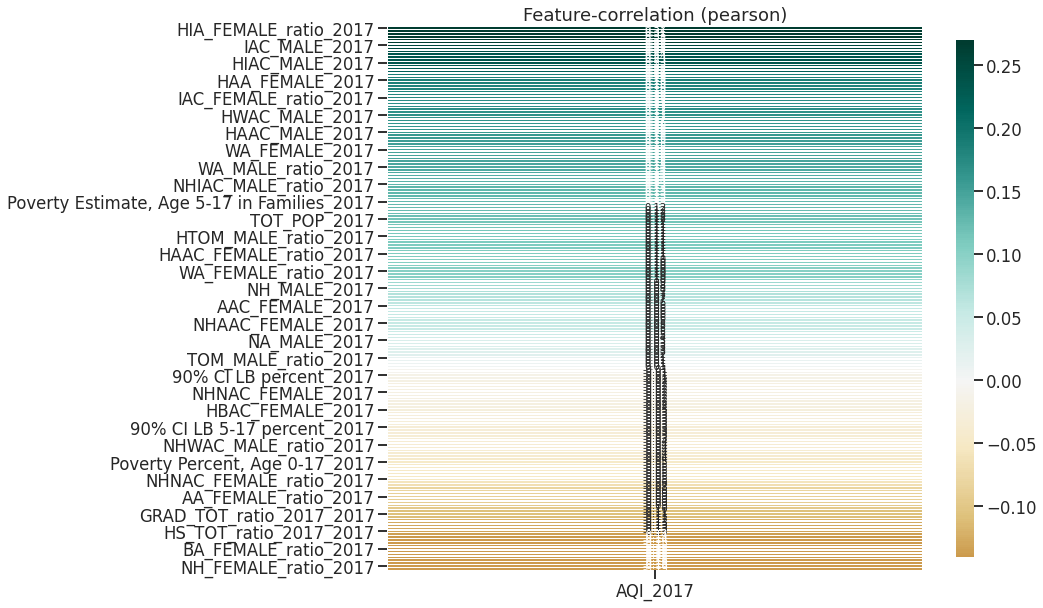

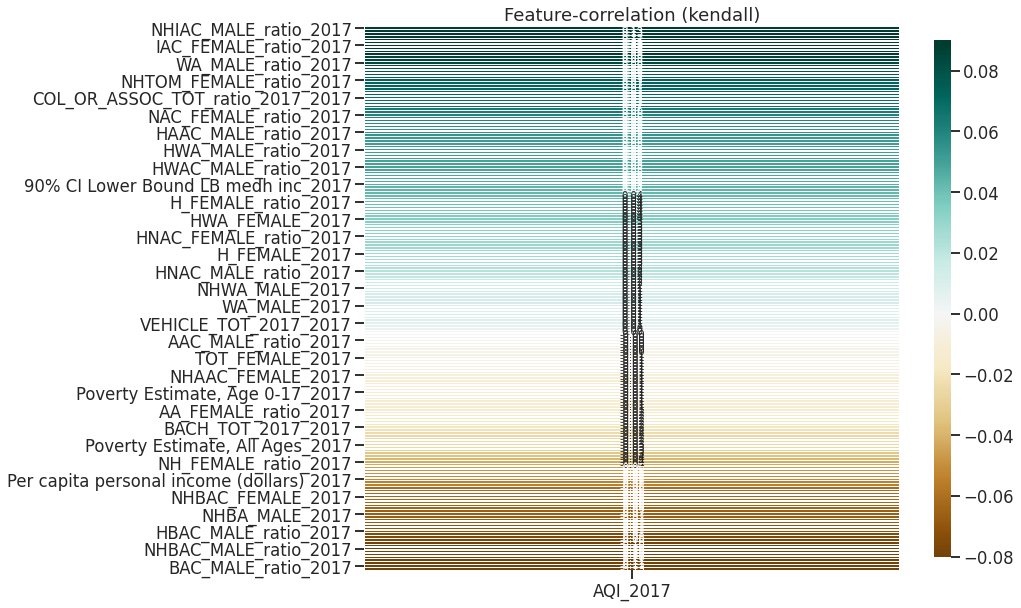

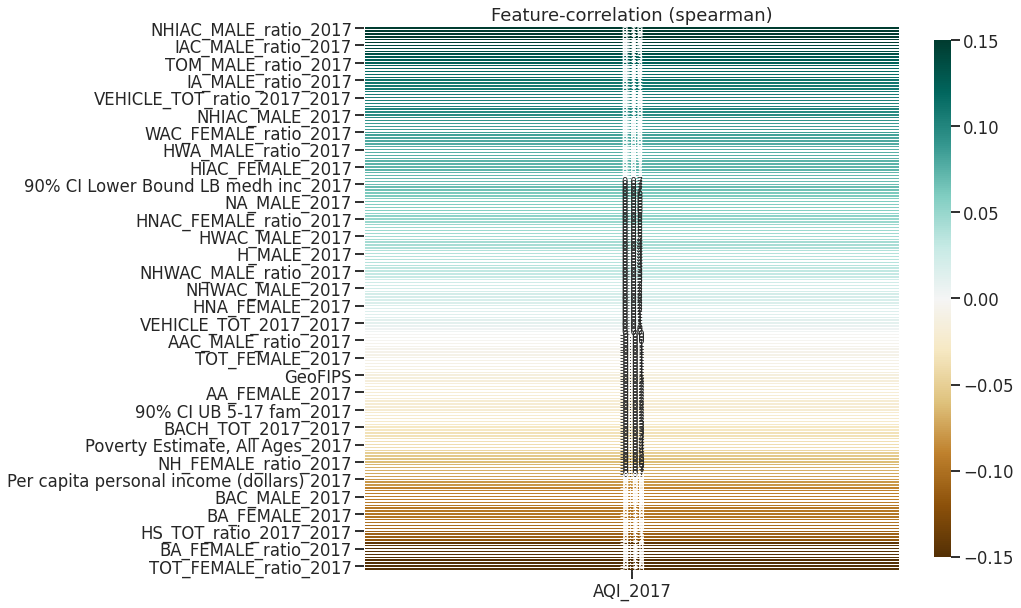

In [14]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [15]:
avg_ozone_2018 = avg_ozone_2017_2019.iloc[:, [0, 1, 2, 4]]

unemploy_col_2018 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[7:11])
unemploy_rate_2018 = unemploy_rate_2017_2019.loc[:, unemploy_col_2018]

pov_col_2018 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[24:45])
pov_rate_2018 = pov_rate_2017_2019.loc[:, pov_col_2018]

incomes_2018 = county_incomes_2017_2019.iloc[:, [0, 3, 6]]

educ_vehicle_2018_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[19:34])
educ_vehicle_2018 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

county_dem_ratio_2018_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[148:293])
county_dem_ratio_2018 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2018_col]

In [16]:
avg_ozone_unemploy_2018 = pd.merge(avg_ozone_2018, unemploy_rate_2018, how='inner')
avg_ozone_unemploy_pov_2018 = pd.merge(avg_ozone_unemploy_2018, pov_rate_2018, how='inner')
avg_ozone_unemploy_pov_inc_2018 = pd.merge(avg_ozone_unemploy_pov_2018, incomes_2018, how='inner')
avg_ozone_unemploy_pov_inc_educ_veh_2018 = pd.merge(avg_ozone_unemploy_pov_inc_2018, educ_vehicle_2018, how='inner')
df_2018 = pd.merge(avg_ozone_unemploy_pov_inc_educ_veh_2018, county_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,County Name,AQI_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,...,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,1003,Alabama,Baldwin,37.952991,95233,91809,3424,3.6,21069.0,17390.0,...,2.281334,2.053201,0.120722,0.120722,0.118427,0.085378,0.028459,0.025705,0.022951,0.014230
1,1049,Alabama,DeKalb,35.976945,30289,29153,1136,3.8,14975.0,13282.0,...,6.814458,6.082037,0.263280,0.207263,0.540563,0.441133,0.089627,0.096629,0.333301,0.261879
2,1051,Alabama,Elmore,35.200000,37590,36313,1277,3.4,8559.0,6765.0,...,1.294886,1.308464,0.137018,0.175285,0.088877,0.076533,0.019750,0.023454,0.023454,0.022219
3,1055,Alabama,Etowah,39.593496,43252,41502,1750,4.0,17509.0,15140.0,...,1.727885,1.528101,0.158852,0.135463,0.159827,0.128641,0.044830,0.038008,0.138387,0.118896
4,1069,Alabama,Houston,35.564315,45580,43764,1816,4.0,17032.0,14978.0,...,1.532882,1.356304,0.194712,0.189940,0.113582,0.102128,0.038179,0.037224,0.024816,0.027680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,55117,Wisconsin,Sheboygan,44.938559,62511,60949,1562,2.5,8432.0,6839.0,...,3.164024,2.937527,0.131039,0.109344,0.140585,0.145792,0.052068,0.052068,0.013017,0.009546
494,55127,Wisconsin,Walworth,41.693277,58245,56532,1713,2.9,10114.0,8549.0,...,5.626268,4.988894,0.137132,0.118783,0.199903,0.163206,0.055046,0.046354,0.019314,0.018349
495,55133,Wisconsin,Waukesha,39.886076,225674,219707,5967,2.6,19937.0,17306.0,...,2.295775,2.248573,0.080244,0.095647,0.077760,0.080741,0.032545,0.031303,0.011925,0.009689
496,56021,Wyoming,Laramie,42.888143,48190,46397,1793,3.7,8839.0,7212.0,...,7.079351,6.603955,0.275123,0.258939,0.419764,0.412684,0.138573,0.123401,0.044505,0.032367


* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

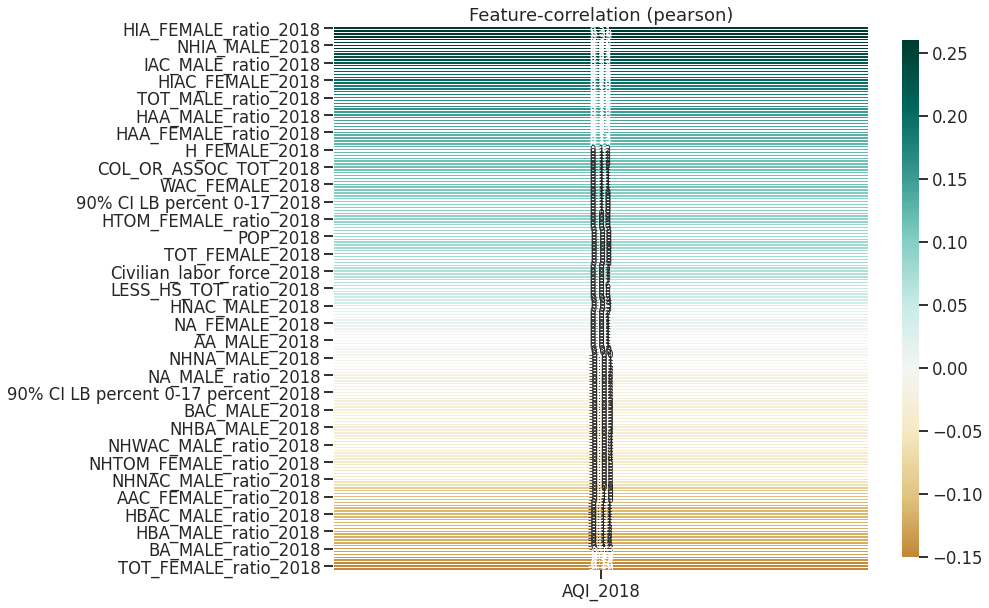

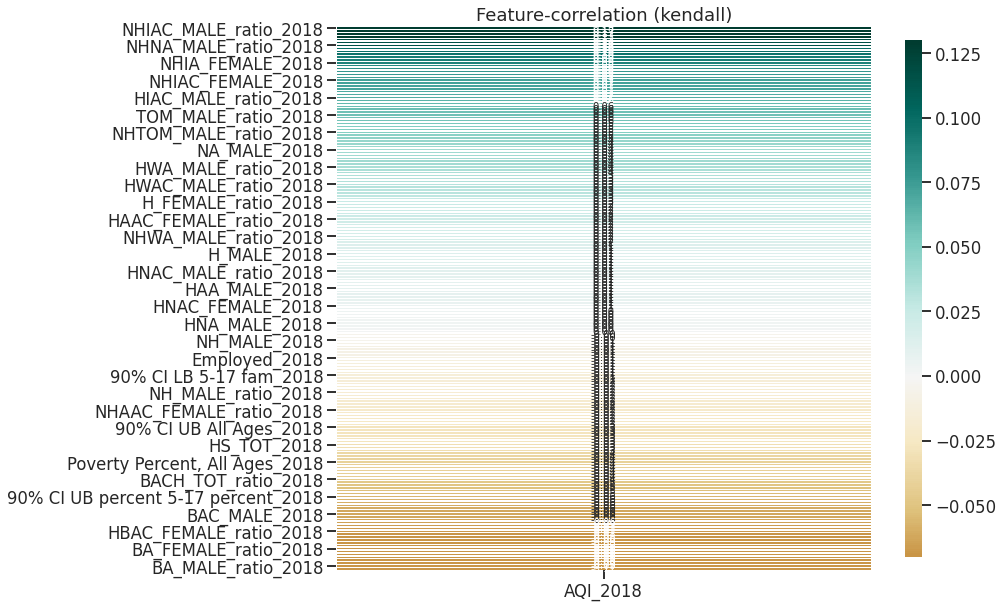

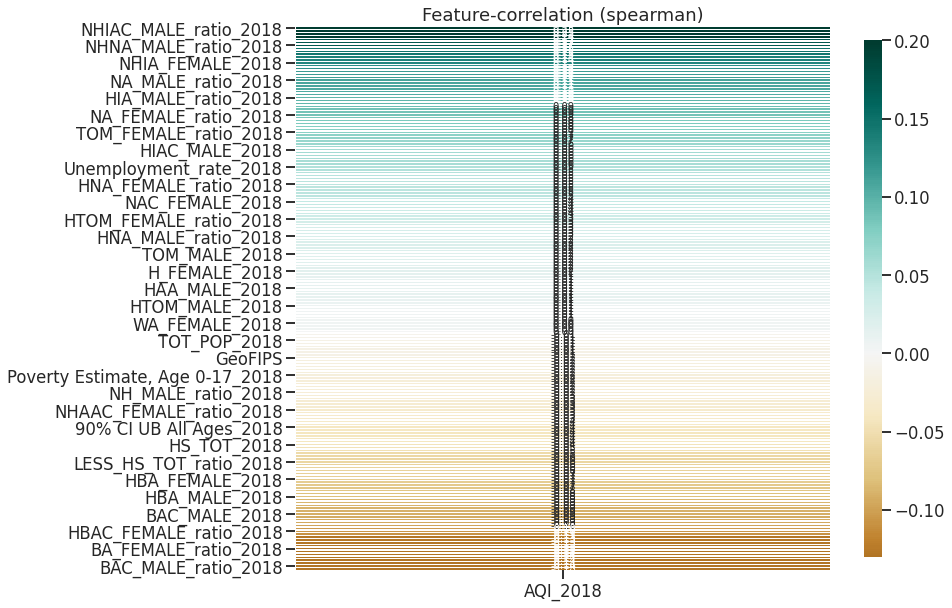

In [17]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [18]:
avg_ozone_2019 = avg_ozone_2017_2019.iloc[:,[0, 1, 2, 5]]

unemploy_col_2019 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[11:])
unemploy_rate_2019 = unemploy_rate_2017_2019.loc[:, unemploy_col_2019]

pov_col_2019 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[45:])
pov_rate_2019 = pov_rate_2017_2019.loc[:, pov_col_2019]

incomes_2019 = county_incomes_2017_2019.iloc[:, [0, 4, 7]]

educ_vehicle_2019_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[34:])
educ_vehicle_2019 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

county_dem_ratio_2019_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[293:])
county_dem_ratio_2019 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2019_col]

In [19]:
avg_ozone_unemploy_2019 = pd.merge(avg_ozone_2019, unemploy_rate_2019, how='inner')
avg_ozone_unemploy_pov_2019 = pd.merge(avg_ozone_unemploy_2019, pov_rate_2019, how='inner')
avg_ozone_unemploy_pov_inc_2019 = pd.merge(avg_ozone_unemploy_pov_2019, incomes_2019, how='inner')
avg_ozone_unemploy_pov_inc_educ_veh_2019 = pd.merge(avg_ozone_unemploy_pov_inc_2019, educ_vehicle_2019, how='inner')
df_2019 = pd.merge(avg_ozone_unemploy_pov_inc_educ_veh_2019, county_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,County Name,AQI_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1003,Alabama,Baldwin,38.098765,97328,94675,2653,2.7,22360.0,18541.0,...,2.304308,2.081224,0.120053,0.125877,0.118262,0.088248,0.030909,0.029117,0.024638,0.015679
1,1049,Alabama,DeKalb,39.093407,31052,30182,870,2.8,12848.0,10674.0,...,6.928810,6.186288,0.269881,0.222337,0.546754,0.458658,0.099283,0.089494,0.321620,0.267084
2,1051,Alabama,Elmore,37.882845,37565,36586,979,2.6,8753.0,6975.0,...,1.382852,1.331133,0.146535,0.168701,0.096048,0.081272,0.029553,0.029553,0.022165,0.022165
3,1055,Alabama,Etowah,41.890244,42723,41295,1428,3.3,18801.0,16286.0,...,1.756170,1.607541,0.161341,0.142762,0.166230,0.139829,0.041069,0.028357,0.142762,0.122228
4,1069,Alabama,Houston,34.556911,46234,44844,1390,3.0,20207.0,18225.0,...,1.564005,1.354338,0.189834,0.192667,0.114278,0.100111,0.039667,0.034945,0.033056,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,55117,Wisconsin,Sheboygan,37.019417,62144,60436,1708,2.7,9051.0,7374.0,...,3.246922,3.014566,0.149991,0.108375,0.141321,0.150858,0.047685,0.061557,0.014739,0.013872
494,55127,Wisconsin,Walworth,38.456311,57872,55975,1897,3.3,9532.0,7892.0,...,5.648515,5.006354,0.141526,0.123233,0.206993,0.183887,0.057766,0.043324,0.015404,0.024069
495,55133,Wisconsin,Waukesha,36.492958,224731,218151,6580,2.9,18915.0,16096.0,...,2.343406,2.297884,0.083870,0.098467,0.085602,0.085354,0.036368,0.037111,0.012618,0.012123
496,56021,Wyoming,Laramie,40.940771,48491,46813,1678,3.5,9194.0,7774.0,...,7.128643,6.737688,0.269347,0.271357,0.423116,0.405025,0.135678,0.125628,0.053266,0.045226


* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

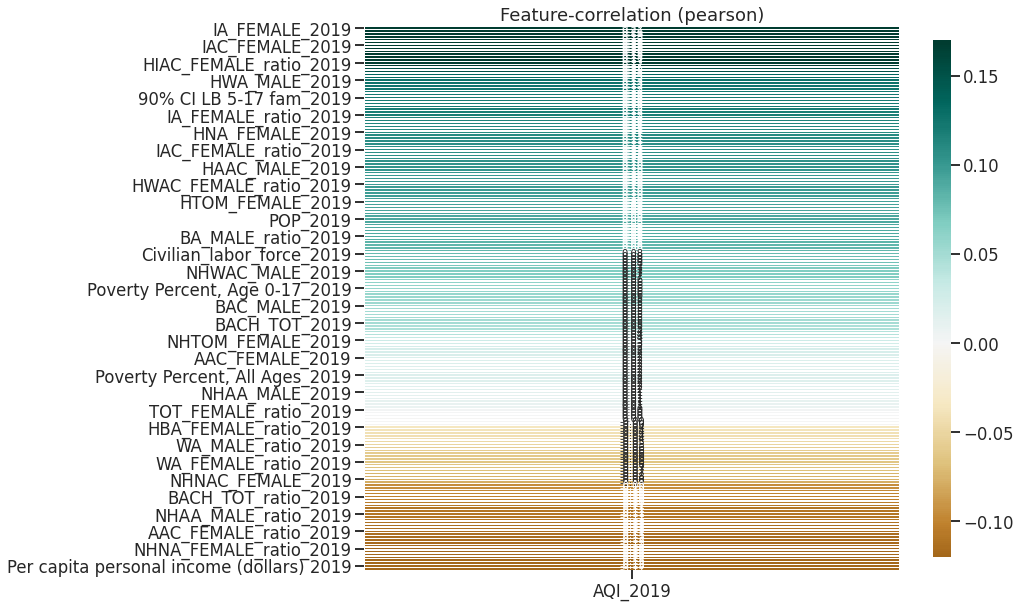

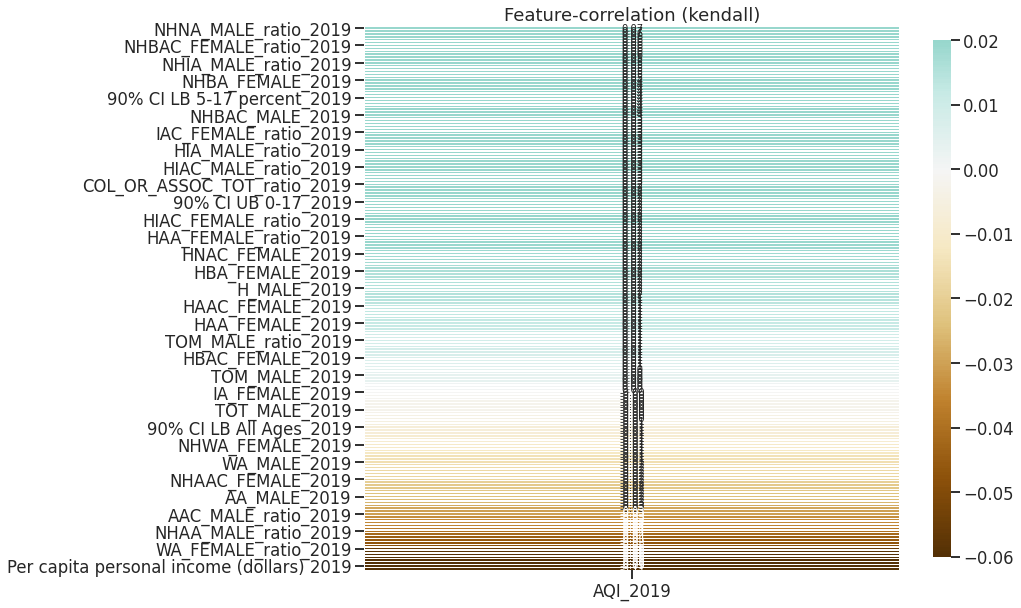

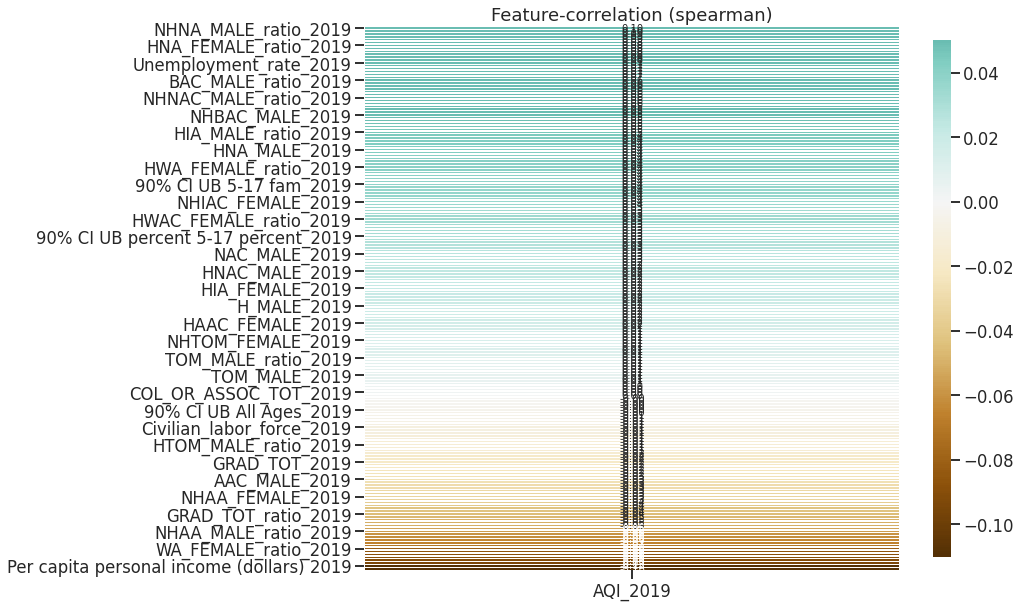

In [20]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [21]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,Personal income (thousands of dollars) 2017,Per capita personal income (dollars) 2017,POP_2017,EDU_TOT_2017_2017,LESS_HS_TOT_2017_2017,HS_TOT_2017_2017,COL_OR_ASSOC_TOT_2017_2017,BACH_TOT_2017_2017,GRAD_TOT_2017_2017,VEHICLE_TOT_2017_2017,EDU_TOT_ratio_2017_2017,LESS_HS_TOT_ratio_2017_2017,HS_TOT_ratio_2017_2017,COL_OR_ASSOC_TOT_ratio_2017_2017,BACH_TOT_ratio_2017_2017,GRAD_TOT_ratio_2017_2017,VEHICLE_TOT_ratio_2017_2017,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,...,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1003,Alabama,B

# save data


In [22]:
# save 2017-2019 dataset
# data_path = r'../../data/processed/all_df_2017_2019'
# df_2017_2019.to_csv(data_path, index=False)
#
# # save datasets for individual years
# data_path = r'../../data/processed/all_ozone_df_2017'
# df_2017.to_csv(data_path, index=False)
# data_path = r'../../data/processed/all_ozone_df_2018'
# df_2018.to_csv(data_path, index=False)
# data_path = r'../../data/processed/all_ozone_df_2019'
# df_2019.to_csv(data_path, index=False)

In [23]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

NHIA_FEMALE_2017          0.231131
HIAC_MALE_2017            0.234484
NHIA_MALE_2017            0.234886
HIA_MALE_2017             0.235829
HIAC_FEMALE_2017          0.235980
HIA_FEMALE_2017           0.240164
IAC_FEMALE_2017           0.251845
IAC_MALE_2017             0.252972
IA_MALE_2017              0.275875
IA_FEMALE_2017            0.277964
HIAC_MALE_ratio_2017      0.311700
HIAC_FEMALE_ratio_2017    0.313409
HIA_MALE_ratio_2017       0.314899
HIA_FEMALE_ratio_2017     0.318400
AQI_2017                  1.000000
Name: AQI_2017, dtype: float64

IAC_FEMALE_ratio_2018     0.218127
IAC_MALE_ratio_2018       0.222119
NHIAC_FEMALE_2018         0.226808
NHIAC_MALE_2018           0.231040
IAC_MALE_2018             0.232251
IAC_FEMALE_2018           0.232451
NHIA_FEMALE_2018          0.259300
NHIA_MALE_2018            0.263210
IA_MALE_2018              0.264201
IA_FEMALE_2018            0.268267
HIAC_MALE_ratio_2018      0.301166
HIAC_FEMALE_ratio_2018    0.304521
HIA_MALE_ratio_2018       0.305472
HIA_FEMALE_ratio_2018     0.311786
AQI_2018                  1.000000
Name: AQI_2018, dtype: float64

HIAC_MALE_ratio_2019      0.168836
HIAC_FEMALE_ratio_2019    0.169701
NHIA_FEMALE_2019          0.174150
NHIA_MALE_2019            0.175545
HIAC_MALE_2019            0.182172
HIAC_FEMALE_2019          0.183279
IAC_MALE_2019             0.185642
IAC_FEMALE_2019           0.186016
HIA_MALE_2019             0.188336
HIA_MALE_ratio_2019       0.188681
HIA_FEMALE_ratio_2019     0.188945
HIA_FEMALE_2019           0.191258
IA_MALE_2019              0.214389
IA_FEMALE_2019            0.215975
AQI_2019                  1.000000
Name: AQI_2019, dtype: float64

In [25]:
display(df_2017.corr()['AQI_2017'].sort_values().head(15))
display(df_2018.corr()['AQI_2018'].sort_values().head(15))
display(df_2019.corr()['AQI_2019'].sort_values().head(15))

EDU_TOT_ratio_2017_2017                     -0.194283
NH_FEMALE_ratio_2017                        -0.184026
TOT_FEMALE_ratio_2017                       -0.179141
NH_MALE_ratio_2017                          -0.158303
BAC_MALE_ratio_2017                         -0.153975
BA_MALE_ratio_2017                          -0.152949
BAC_FEMALE_ratio_2017                       -0.148175
BA_FEMALE_ratio_2017                        -0.147308
NHBAC_MALE_ratio_2017                       -0.145687
NHBA_MALE_ratio_2017                        -0.145442
NHBAC_FEMALE_ratio_2017                     -0.140943
NHBA_FEMALE_ratio_2017                      -0.140846
HBA_MALE_ratio_2017                         -0.135033
HS_TOT_ratio_2017_2017                      -0.131898
Per capita personal income (dollars) 2017   -0.129333
Name: AQI_2017, dtype: float64

EDU_TOT_ratio_2018                          -0.197581
TOT_FEMALE_ratio_2018                       -0.163956
NH_FEMALE_ratio_2018                        -0.162295
NH_MALE_ratio_2018                          -0.137574
Per capita personal income (dollars) 2018   -0.132504
HS_TOT_ratio_2018                           -0.128736
BAC_MALE_ratio_2018                         -0.128223
BA_MALE_ratio_2018                          -0.126147
NHBAC_MALE_ratio_2018                       -0.120812
BAC_FEMALE_ratio_2018                       -0.120811
NHBA_MALE_ratio_2018                        -0.119450
BA_FEMALE_ratio_2018                        -0.118951
NHAA_MALE_ratio_2018                        -0.116384
HBA_MALE_ratio_2018                         -0.116149
NHAA_FEMALE_ratio_2018                      -0.116114
Name: AQI_2018, dtype: float64

EDU_TOT_ratio_2019                          -0.172376
Per capita personal income (dollars) 2019   -0.126327
NHTOM_MALE_ratio_2019                       -0.124856
NHNAC_FEMALE_ratio_2019                     -0.122587
NHWAC_MALE_ratio_2019                       -0.121529
NHWAC_FEMALE_ratio_2019                     -0.120478
NHAAC_FEMALE_ratio_2019                     -0.120396
NHNA_FEMALE_ratio_2019                      -0.120372
NHTOM_FEMALE_ratio_2019                     -0.117595
NHAAC_MALE_ratio_2019                       -0.117537
NHNAC_MALE_ratio_2019                       -0.116585
NHWA_MALE_ratio_2019                        -0.115579
NHWA_FEMALE_ratio_2019                      -0.114816
AAC_FEMALE_ratio_2019                       -0.114454
NHAA_FEMALE_ratio_2019                      -0.114295
Name: AQI_2019, dtype: float64

In [24]:
display(df_2017.shape)
display(df_2018.shape)
display(df_2019.shape)

(498, 191)

(498, 191)

(498, 191)